In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')


C:\Users\iammo\AppData\Local\Temp\ipykernel_3384\2833140351.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [12]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [13]:
books.shape

(271360, 8)

In [26]:
books.describe()


,Year-Of-Publication
count,271357.000000
mean,1959.760817
std,257.994226
min,0.000000
25%,1989.000000
50%,1995.000000
75%,2000.000000
max,2050.000000


In [15]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [16]:
books.duplicated().sum()

0

In [17]:
numerical_columns = books.select_dtypes(include=np.number).columns
books[numerical_columns] = books[numerical_columns].fillna(books[numerical_columns].mean())

In [18]:
books.drop_duplicates(inplace=True)

In [20]:
df = books


In [21]:
df['Year-Of-Publication'] = pd.to_numeric(df['Year-Of-Publication'], errors='coerce')

In [22]:
df = df.dropna(subset=['Year-Of-Publication'])

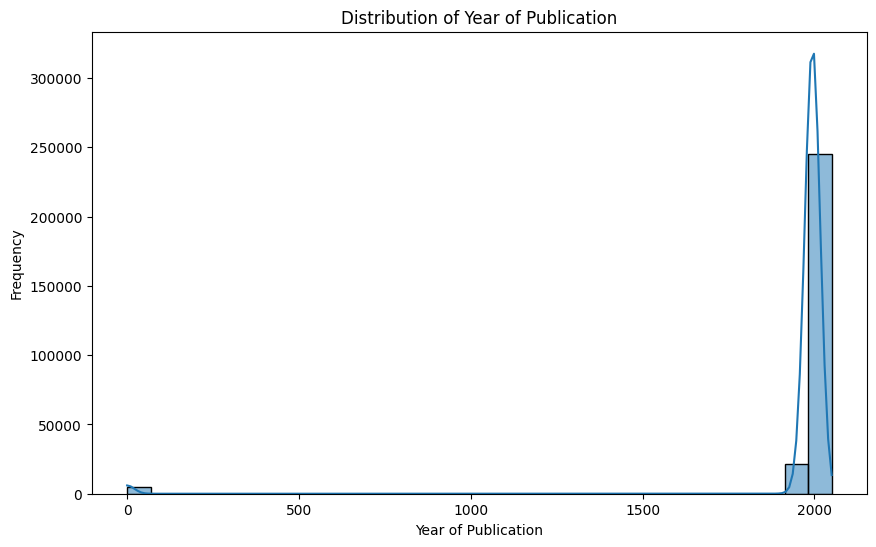

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Year-Of-Publication'], bins=30, kde=True)
plt.title('Distribution of Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Frequency')
plt.show()

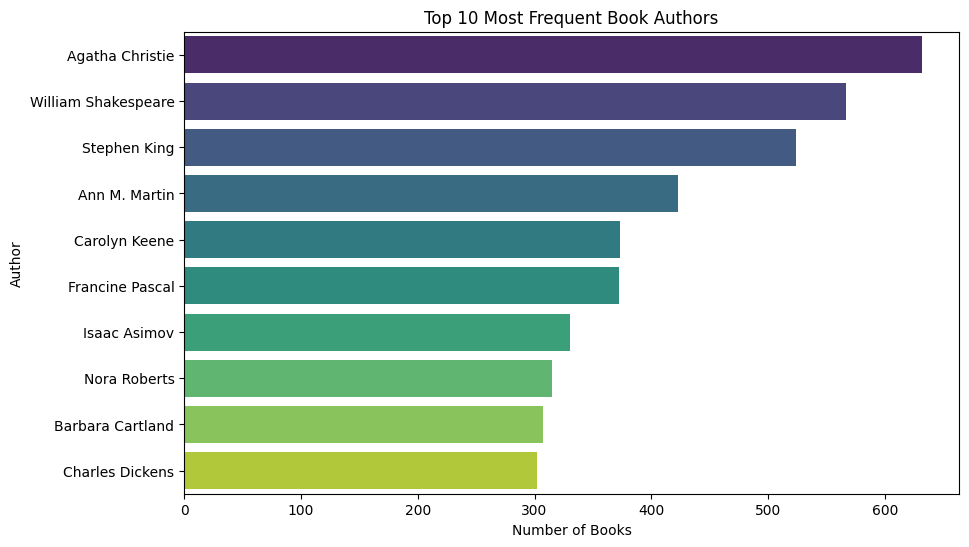

In [24]:
top_authors = df['Book-Author'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
plt.title('Top 10 Most Frequent Book Authors')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

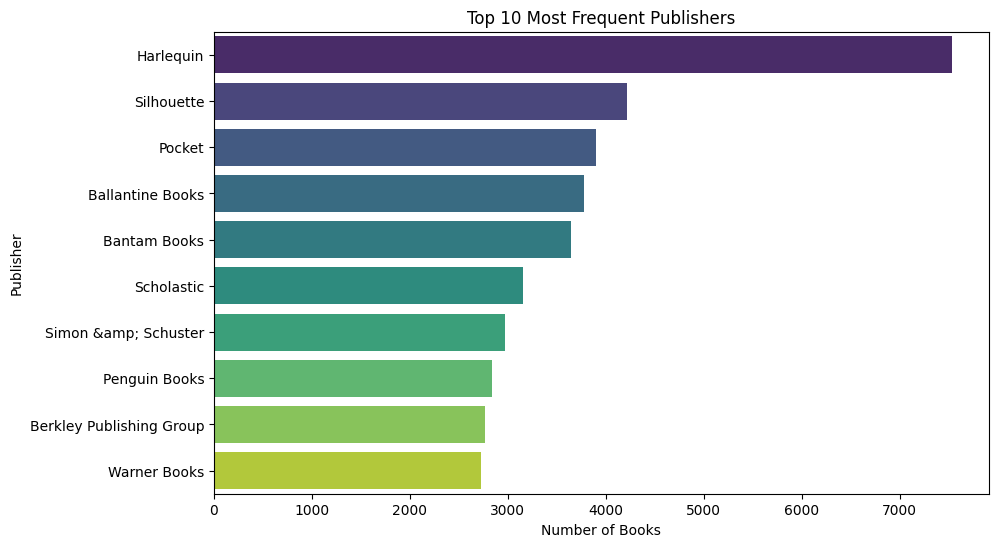

In [25]:
top_publishers = df['Publisher'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title('Top 10 Most Frequent Publishers')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.show()


In [27]:
books = df

In [28]:
ratings_with_name = ratings.merge(books,on ='ISBN')

In [ ]:
ratings_with_name.groupby('Book-Title').count()[['Book']]